In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor


In [163]:
data = pd.read_csv('train.csv',index_col=0)

In [164]:
data.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [165]:
data.describe()

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,7.000000,1.000000


In [166]:
data.dtypes

road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [167]:
features = data.columns.tolist()

In [168]:
num_feature = [feature for feature in features if data[feature].dtype != object  and  data[feature].dtype != bool]
num_feature

['num_lanes',
 'curvature',
 'speed_limit',
 'num_reported_accidents',
 'accident_risk']

<Axes: >

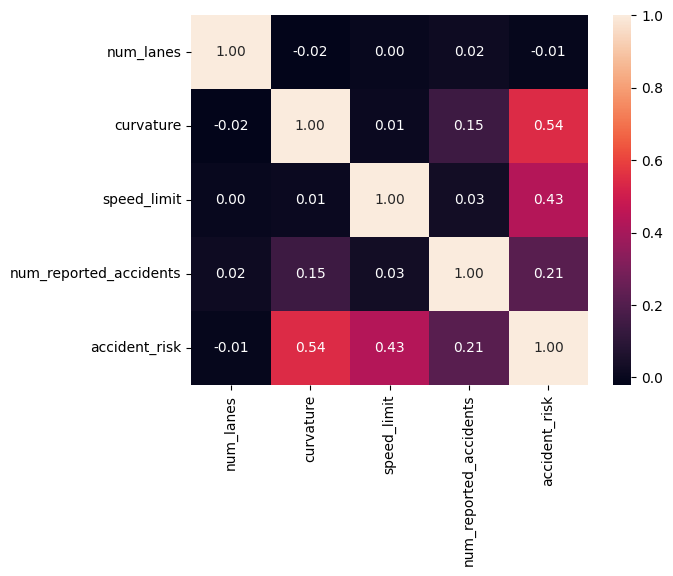

In [169]:
sns.heatmap(data[num_feature].corr(), annot=True, fmt='.2f')

In [170]:
cat_feature = [feature for feature in features  if data[feature].dtype == object or data[feature].dtype ==bool]
cat_feature

['road_type',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season']

In [171]:
accident_risk =data['accident_risk']

(0.25, 0.41106130506091854)

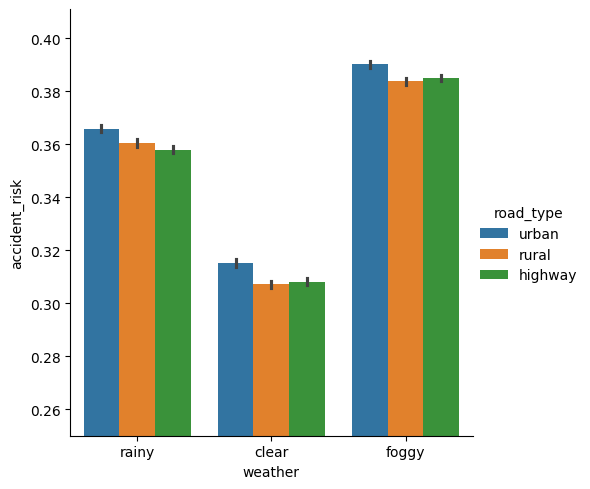

In [172]:
sns.catplot(data=data, y=data['accident_risk'],x=data['weather'],kind='bar',hue='road_type')
plt.ylim(0.25)

(0.1, 0.5417630499720557)

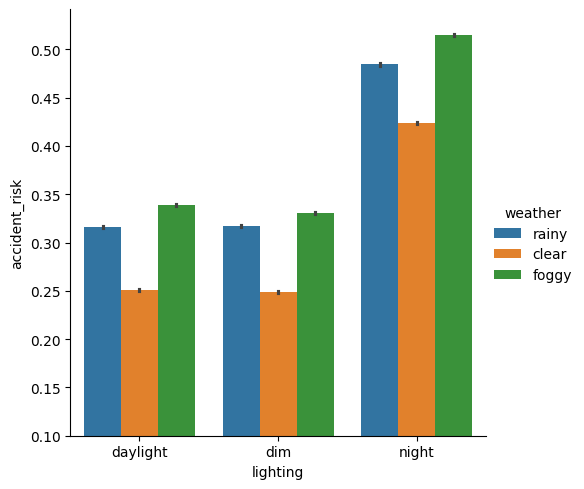

In [173]:
sns.catplot(data=data, y=data['accident_risk'],x=data['lighting'],kind='bar',hue= 'weather')
plt.ylim(0.1)

(0.1, 1.05)

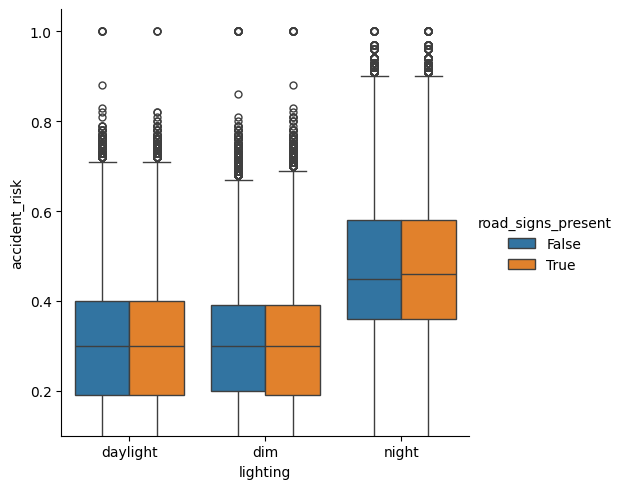

In [174]:
sns.catplot(data=data, y=data['accident_risk'],x=data['lighting'],hue= 'road_signs_present',kind='box')
plt.ylim(0.1)

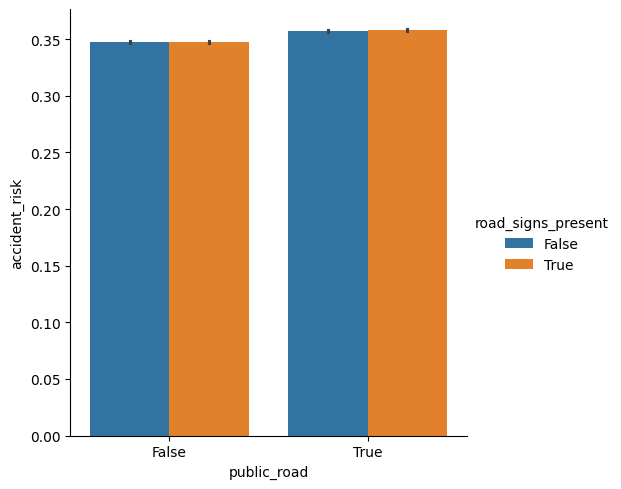

In [175]:
sns.catplot(data=data, y=data['accident_risk'],x=data['public_road'],kind='bar',hue= 'road_signs_present')

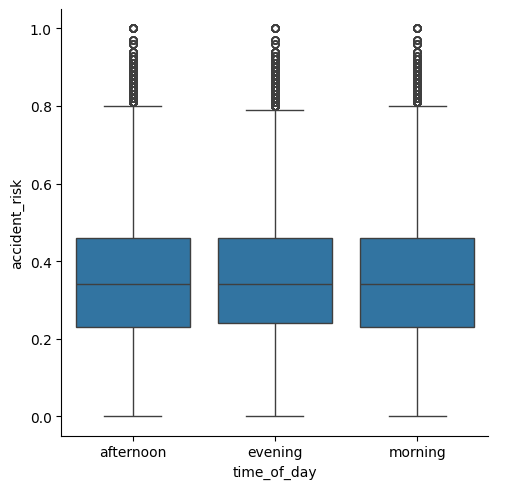

In [176]:
sns.catplot(data=data, y=data['accident_risk'],x=data['time_of_day'],kind='box')


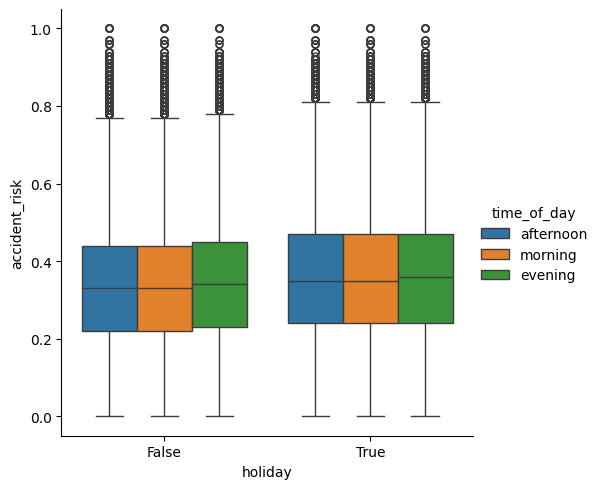

In [177]:
sns.catplot(data=data, y=data['accident_risk'],x=data['holiday'],kind='box',hue= 'time_of_day')

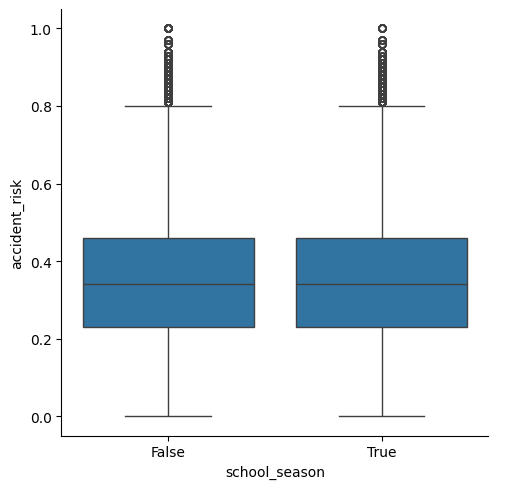

In [178]:
sns.catplot(data=data, y=data['accident_risk'],x=data['school_season'],kind='box')

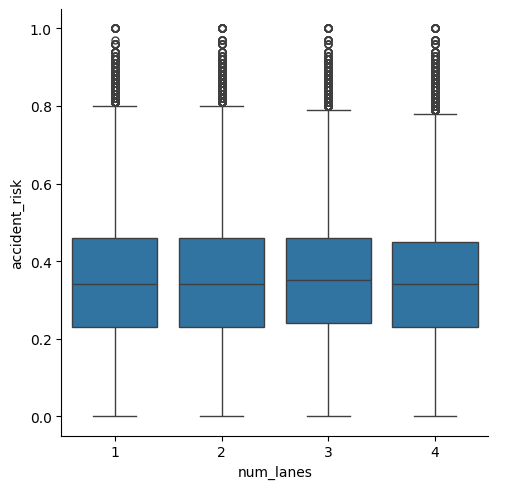

In [179]:
sns.catplot(data=data, y=data['accident_risk'],x=data['num_lanes'],kind='box')

In [180]:
cat_feature.remove('time_of_day')
cat_feature.remove('school_season')

In [181]:
uneffected_variable = ['num_lanes','time_of_day','school_season']

In [182]:
for items in uneffected_variable:
    features.remove(items)

In [183]:
bool_feature = [feature for feature in features  if  data[feature].dtype ==bool]
bool_feature

['road_signs_present', 'public_road', 'holiday']

In [184]:
for items in bool_feature:
    cat_feature.remove(items)

In [185]:
features.remove('accident_risk')


In [201]:
train_data = data[features]
train_data

,road_type,curvature,speed_limit,lighting,weather,road_signs_present,public_road,holiday,num_reported_accidents
id,,,,,,,,,
0,urban,0.06,35,daylight,rainy,False,True,False,1
1,urban,0.99,35,daylight,clear,True,False,True,0
2,rural,0.63,70,dim,clear,False,True,True,2
3,highway,0.07,35,dim,rainy,True,True,False,1
4,rural,0.58,60,daylight,foggy,False,False,True,1
...,...,...,...,...,...,...,...,...,...
517749,highway,0.10,70,daylight,foggy,True,True,False,2
517750,rural,0.47,35,daylight,rainy,True,True,False,1
517751,urban,0.62,25,daylight,foggy,False,False,False,0


In [202]:
train_data = pd.get_dummies(train_data,columns=cat_feature)
train_columns=train_data.columns

In [203]:
train_data.head()

,curvature,speed_limit,road_signs_present,public_road,holiday,num_reported_accidents,road_type_highway,road_type_rural,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy
id,,,,,,,,,,,,,,,
0,0.06,35,False,True,False,1,False,False,True,True,False,False,False,False,True
1,0.99,35,True,False,True,0,False,False,True,True,False,False,True,False,False
2,0.63,70,False,True,True,2,False,True,False,False,True,False,True,False,False
3,0.07,35,True,True,False,1,True,False,False,False,True,False,False,False,True
4,0.58,60,False,False,True,1,False,True,False,True,False,False,False,True,False


In [204]:
train_data.describe()

,curvature,speed_limit,num_reported_accidents
count,517754.000000,517754.000000,517754.000000
mean,0.488719,46.112575,1.187970
std,0.272563,15.788521,0.895961
min,0.000000,25.000000,0.000000
25%,0.260000,35.000000,1.000000
50%,0.510000,45.000000,1.000000
75%,0.710000,60.000000,2.000000
max,1.000000,70.000000,7.000000


In [208]:
scaler = MinMaxScaler()
scaler.fit(train_data[['curvature','speed_limit','num_reported_accidents']])


,feature_range,"(0, ...)"
,copy,True
,clip,False


In [210]:
scaled_train_data =train_data
scaled_train_data[['curvature','speed_limit','num_reported_accidents']]=scaler.transform(train_data[['curvature','speed_limit','num_reported_accidents']])
scaled_train_data = pd.DataFrame(scaled_train_data,columns=train_columns)
scaled_train_data

,curvature,speed_limit,road_signs_present,public_road,holiday,num_reported_accidents,road_type_highway,road_type_rural,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy
id,,,,,,,,,,,,,,,
0,0.06,0.222222,False,True,False,0.142857,False,False,True,True,False,False,False,False,True
1,0.99,0.222222,True,False,True,0.000000,False,False,True,True,False,False,True,False,False
2,0.63,1.000000,False,True,True,0.285714,False,True,False,False,True,False,True,False,False
3,0.07,0.222222,True,True,False,0.142857,True,False,False,False,True,False,False,False,True
4,0.58,0.777778,False,False,True,0.142857,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.10,1.000000,True,True,False,0.285714,True,False,False,True,False,False,False,True,False
517750,0.47,0.222222,True,True,False,0.142857,False,True,False,True,False,False,False,False,True
517751,0.62,0.000000,False,False,False,0.000000,False,False,True,True,False,False,False,True,False


In [230]:
x_train,x_test,y_train,y_test = train_test_split(scaled_train_data,accident_risk,test_size=0.2)

In [233]:
model =XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=6)
model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [238]:
prediction=model.predict(x_test)
score=model.score(x_test,y_test)
mae = mean_squared_error(y_test,prediction)
r2 = r2_score(y_test,prediction)
print('score =',score)
print('mae =',mae)
print('r2 =',r2)

score = 0.885389618588944
mae = 0.003174870185768802
r2 = 0.885389618588944


In [239]:
test_data= pd.read_csv('test.csv',index_col=0)

In [241]:
test_data=pd.get_dummies(test_data,columns=cat_feature)

In [243]:
scaled_test_data =test_data
scaled_test_data[['curvature','speed_limit','num_reported_accidents']]=scaler.transform(test_data[['curvature','speed_limit','num_reported_accidents']])
scaled_test_data = pd.DataFrame(scaled_test_data,columns=train_columns)
scaled_test_data

,curvature,speed_limit,road_signs_present,public_road,holiday,num_reported_accidents,road_type_highway,road_type_rural,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy
id,,,,,,,,,,,,,,,
517754,0.34,0.444444,True,True,True,0.142857,True,False,False,False,False,True,True,False,False
517755,0.04,0.444444,True,False,True,0.000000,False,False,True,False,True,False,False,True,False
517756,0.59,0.222222,True,False,True,0.142857,False,False,True,False,True,False,True,False,False
517757,0.95,0.222222,False,False,False,0.285714,False,True,False,True,False,False,False,False,True
517758,0.86,0.222222,True,False,False,0.428571,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690334,0.01,0.444444,False,False,True,0.285714,False,True,False,False,True,False,False,False,True
690335,0.74,1.000000,False,True,False,0.285714,False,True,False,True,False,False,False,True,False
690336,0.14,1.000000,False,False,True,0.142857,False,False,True,False,True,False,True,False,False


In [246]:
accident_risk=model.predict(scaled_test_data)
scaled_test_data['accident_risk']=accident_risk

In [249]:
scaled_test_data['accident_risk'].to_csv('submission1.csv')